# 02 - Exploratory Data Analysis (EDA)

**Credit Risk Assessment Model**

This notebook covers:
- Target variable analysis
- Feature distributions
- Correlation analysis
- Default rates by segments
- Interactive visualizations with Plotly

**Skills Demonstrated**: matplotlib, seaborn, Plotly, pandas

---

## 1. Import Libraries & Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', 50)

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# Load cleaned data
df = pd.read_csv('../data/processed/loan_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
df.head()

Dataset shape: (250000, 40)
Rows: 250,000
Columns: 40


loan_amnt  term  int_rate  installment grade sub_grade emp_length  \
0    35000.0  36.0      7.26      1084.87     A        A4  10+ years   
1    17000.0  36.0     13.67       578.30     C        C3    2 years   
2     5600.0  36.0      8.59       177.02     A        A5    3 years   
3     2400.0  36.0      6.99        74.10     A        A3    3 years   
4    20000.0  36.0      7.90       625.81     A        A4    9 years   

  home_ownership  annual_inc verification_status             purpose  \
0       MORTGAGE    420509.0            Verified  debt_consolidation   
1           RENT     63000.0            Verified  debt_consolidation   
2           RENT     40000.0     Source Verified  debt_consolidation   
3       MORTGAGE     67300.0        Not Verified         credit_card   
4       MORTGAGE    100000.0            Verified         credit_card   

  addr_state    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0         TX   6.62          0.0         May-1997           740.0   
1         TX  24.65          1.0         Oct-1986           670.0   
2         TN  11.07          1.0         Jul-2007           695.0   
3         OH  12.84          0.0         Jul-2002           665.0   
4         CA  14.94          0.0         Aug-2004           725.0   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0            744.0             0.0                    31.0   
1            674.0             0.0                    19.0   
2            699.0             0.0                    11.0   
3            669.0             0.0                    31.0   
4            729.0             0.0                    31.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                    71.0      16.0      0.0    40692.0        50.7   
1                    71.0       6.0      0.0        0.0        52.1   
2                    71.0      15.0      0.0     5735.0        32.2   
3                    71.0      10.0      0.0    15649.0        56.5   
4                    71.0      10.0      0.0    18712.0        64.6   

   total_acc  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0       37.0                         0.0             0.0           0.0   
1       22.0                         0.0             0.0           0.0   
2       28.0                         0.0             0.0           0.0   
3       14.0                         0.0             0.0           0.0   
4       26.0                         0.0             0.0           0.0   

   tot_cur_bal  total_rev_hi_lim  loan_status   issue_d  target  \
0     549102.0           80200.0   Fully Paid  Oct-2015       0   
1      61570.0               0.0  Charged Off  Feb-2016       1   
2      26825.0           17800.0   Fully Paid  Jun-2016       0   
3     168480.0           27700.0   Fully Paid  Jan-2015       0   
4     435490.0           28958.0   Fully Paid  Jul-2013       0   

   emp_length_num earliest_cr_line_dt  credit_history_years  loan_to_income  \
0            10.0          1997-05-01             21.682192        0.083232   
1             2.0          1986-10-01             32.271233        0.269837   
2             3.0          2007-07-01             11.509589        0.139997   
3             3.0          2002-07-01             16.512329        0.035661   
4             9.0          2004-08-01             14.424658        0.199998   

   monthly_debt_burden  fico_avg  grade_num  
0             0.030958     742.0          7  
1             0.110131     672.0          5  
2             0.053090     697.0          7  
3             0.013210     667.0          7  
4             0.075088     727.0          7

In [8]:
# Quick overview
print("Data Types:")
print(df.dtypes)
print(f"\nMissing values: {df.isnull().sum().sum()}")

Data Types:
loan_amnt                     float64
term                          float64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
collections_12_mths_ex_med    float64


---
## 2. Target Variable Analysis

Understanding the distribution of defaults vs. fully paid loans.

In [9]:
# Target distribution
target_counts = df['target'].value_counts()
target_pct = df['target'].value_counts(normalize=True) * 100

print("Target Distribution:")
print(f"Fully Paid (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"Default (1):    {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\nDefault Rate: {df['target'].mean()*100:.2f}%")

Target Distribution:
Fully Paid (0): 196,289 (78.52%)
Default (1):    53,711 (21.48%)

Default Rate: 21.48%


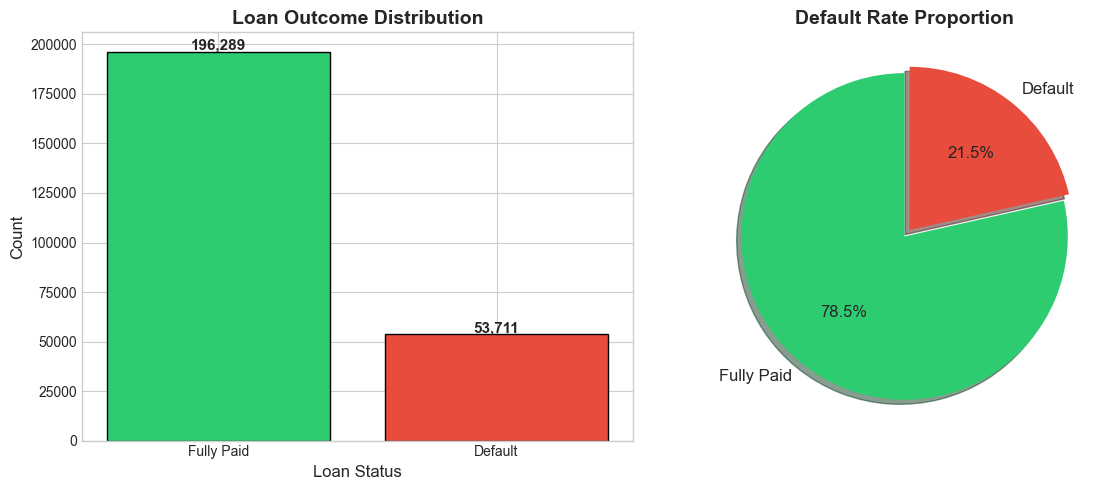

✓ Saved to ../images/01_target_distribution.png


In [10]:
# Visualization: Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Fully Paid', 'Default'], target_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Loan Outcome Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Loan Status', fontsize=12)

# Add count labels on bars
for bar, count in zip(bars, target_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                 f'{count:,}', ha='center', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['Fully Paid', 'Default'], autopct='%1.1f%%',
            colors=colors, explode=(0, 0.05), shadow=True, startangle=90,
            textprops={'fontsize': 12})
axes[1].set_title('Default Rate Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/01_target_distribution.png")

---
## 3. Numerical Features Distribution

In [11]:
# Key numerical features to analyze
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 
                      'fico_avg', 'revol_util', 'credit_history_years']

# Check which features exist
numerical_features = [col for col in numerical_features if col in df.columns]
print(f"Analyzing {len(numerical_features)} numerical features")

Analyzing 7 numerical features


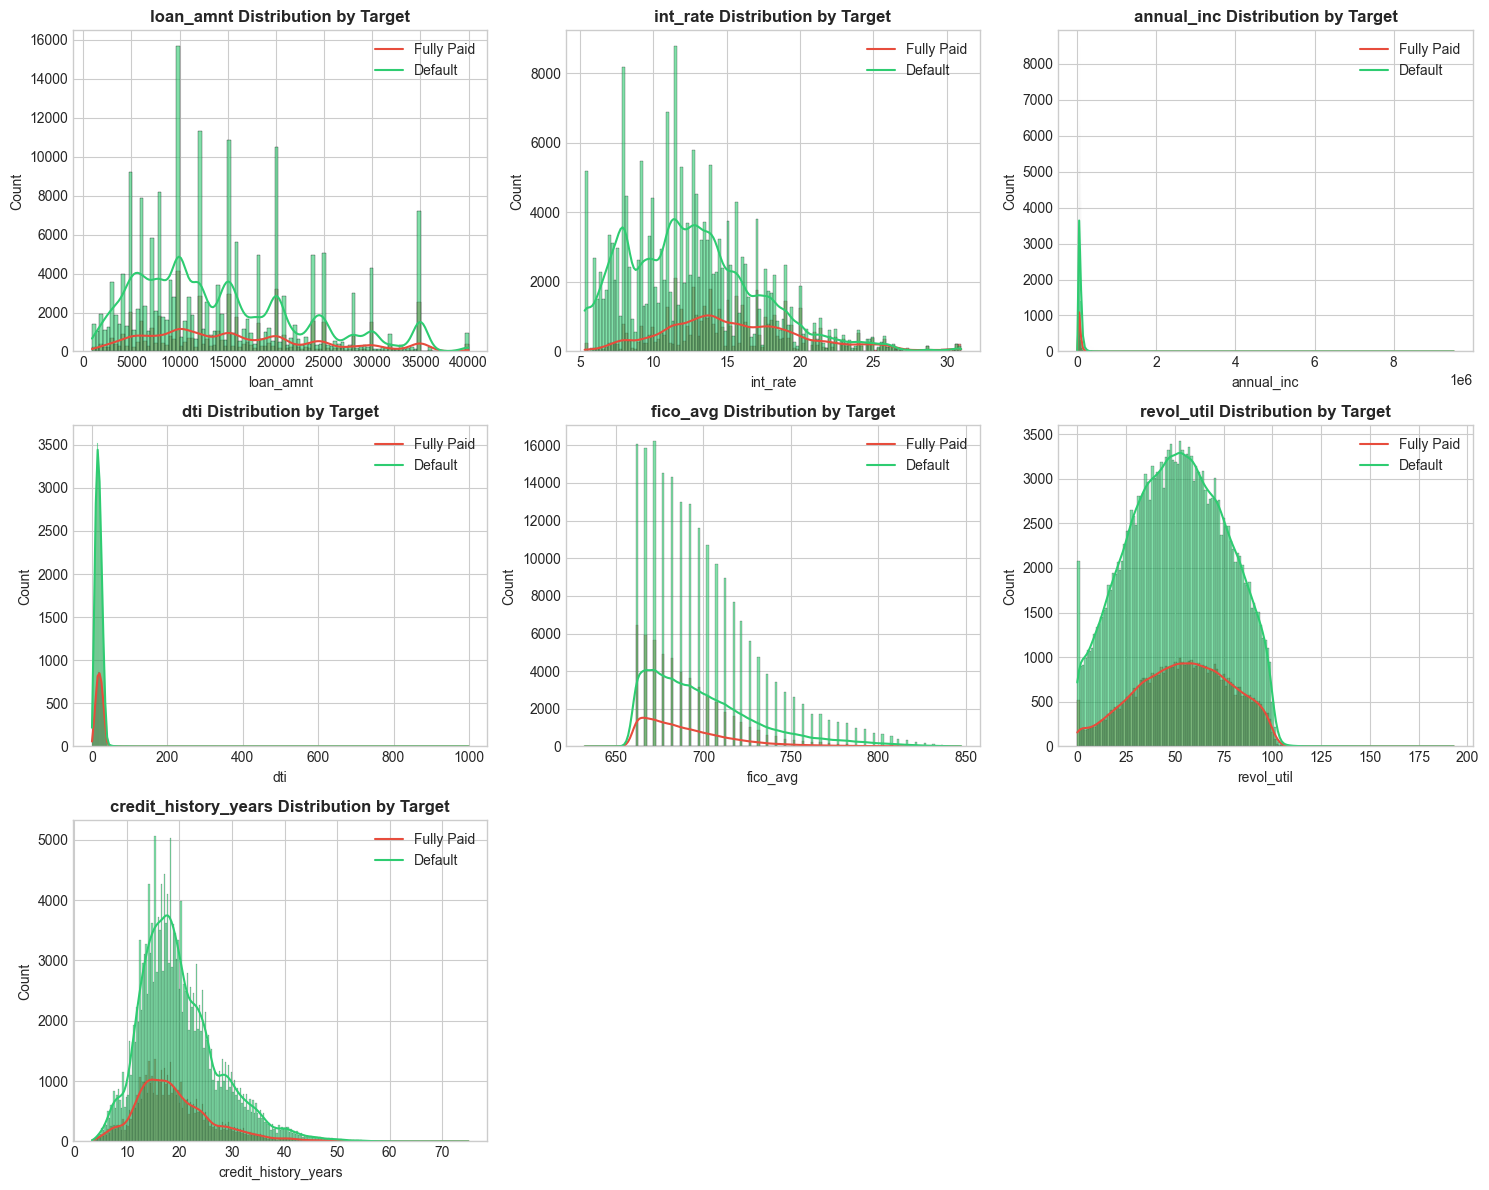

✓ Saved to ../images/02_numerical_distributions.png


In [12]:
# Distribution plots for numerical features
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=df, x=col, hue='target', kde=True, ax=axes[i], 
                 palette={0: '#2ecc71', 1: '#e74c3c'}, alpha=0.6)
    axes[i].set_title(f'{col} Distribution by Target', fontsize=12, fontweight='bold')
    axes[i].legend(['Fully Paid', 'Default'])

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('../images/02_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/02_numerical_distributions.png")

In [13]:
# Statistical summary by target
print("Mean values by Target:")
print("="*60)
summary = df.groupby('target')[numerical_features].mean().T
summary.columns = ['Fully Paid', 'Default']
summary['Difference'] = summary['Default'] - summary['Fully Paid']
summary['% Diff'] = (summary['Difference'] / summary['Fully Paid'] * 100).round(2)
print(summary.round(2))

Mean values by Target:
                      Fully Paid   Default  Difference  % Diff
loan_amnt               14143.25  15695.49     1552.23   10.98
int_rate                   12.64     15.65        3.01   23.79
annual_inc              77651.76  71151.53    -6500.24   -8.37
dti                        17.80     20.11        2.31   12.98
fico_avg                  700.17    690.29       -9.88   -1.41
revol_util                 51.09     54.28        3.20    6.25
credit_history_years       20.00     19.10       -0.90   -4.52


---
## 4. Default Rate by Loan Grade

This is a KEY visualization showing risk segmentation.

In [14]:
# Default rate by grade
grade_default = df.groupby('grade').agg(
    total_loans=('target', 'count'),
    defaults=('target', 'sum'),
    default_rate=('target', 'mean')
).reset_index()

grade_default['default_rate_pct'] = grade_default['default_rate'] * 100
grade_default = grade_default.sort_values('grade')

print("Default Rate by Grade:")
print(grade_default.to_string(index=False))

Default Rate by Grade:
grade  total_loans  defaults  default_rate  default_rate_pct
    A        43195      2933      0.067901          6.790138
    B        72408     10798      0.149127         14.912717
    C        71204     17336      0.243469         24.346947
    D        37908     12068      0.318350         31.834969
    E        17505      6961      0.397658         39.765781
    F         6026      2737      0.454198         45.419847
    G         1754       878      0.500570         50.057013


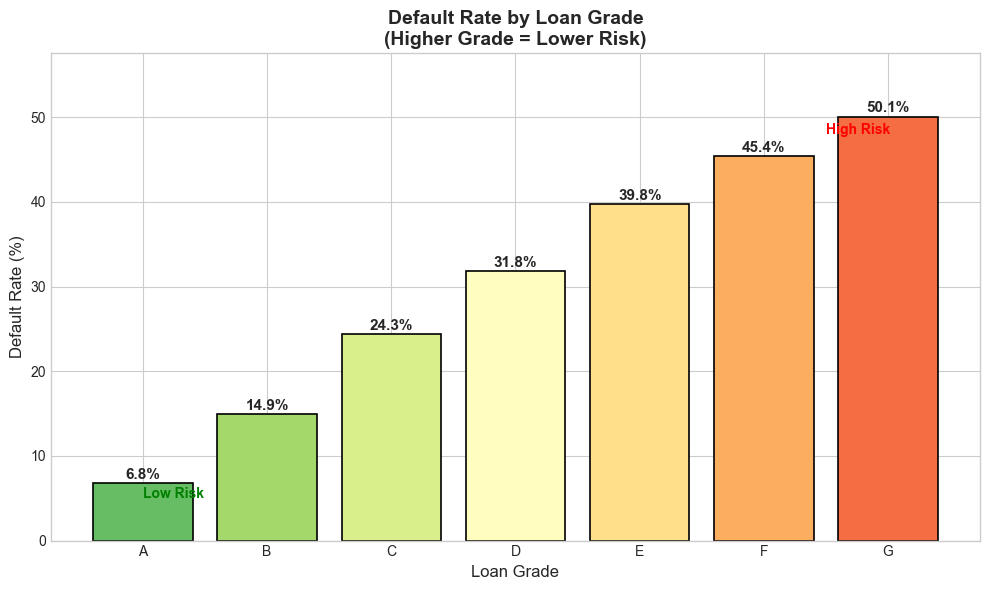

✓ Saved to ../images/03_default_by_grade.png


In [15]:
# Visualization: Default Rate by Grade (matplotlib)
fig, ax = plt.subplots(figsize=(10, 6))

# Create gradient colors (green to red)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(grade_default)))

bars = ax.bar(grade_default['grade'], grade_default['default_rate_pct'], 
              color=colors, edgecolor='black', linewidth=1.2)

# Add percentage labels on bars
for bar, rate in zip(bars, grade_default['default_rate_pct']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{rate:.1f}%', ha='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Loan Grade', fontsize=12)
ax.set_ylabel('Default Rate (%)', fontsize=12)
ax.set_title('Default Rate by Loan Grade\n(Higher Grade = Lower Risk)', 
             fontsize=14, fontweight='bold')
ax.set_ylim(0, max(grade_default['default_rate_pct']) * 1.15)

# Add risk annotation
ax.annotate('Low Risk', xy=(0, 5), fontsize=10, color='green', fontweight='bold')
ax.annotate('High Risk', xy=(5.5, grade_default['default_rate_pct'].max()-2), 
            fontsize=10, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('../images/03_default_by_grade.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/03_default_by_grade.png")

In [16]:
# Interactive version with Plotly
fig = px.bar(grade_default, x='grade', y='default_rate_pct',
             color='default_rate_pct',
             color_continuous_scale='RdYlGn_r',
             title='<b>Default Rate by Loan Grade</b>',
             labels={'grade': 'Loan Grade', 'default_rate_pct': 'Default Rate (%)'},
             text='default_rate_pct')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    xaxis_title='Loan Grade',
    yaxis_title='Default Rate (%)',
    showlegend=False,
    height=500
)

fig.write_html('../images/03_default_by_grade_interactive.html')
fig.show()
print("✓ Saved to ../images/03_default_by_grade_interactive.html")

✓ Saved to ../images/03_default_by_grade_interactive.html


---
## 5. Correlation Analysis

In [17]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID-like columns if any
exclude_cols = ['id', 'member_id']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

print(f"Computing correlation for {len(numeric_cols)} features")

Computing correlation for 29 features


In [18]:
# Correlation with target (most important!)
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)

print("Correlation with Default (Target):")
print("="*50)
print("\nPositive correlations (higher value = more default):")
print(target_corr[target_corr > 0].head(10))
print("\nNegative correlations (higher value = less default):")
print(target_corr[target_corr < 0].head(10))

Correlation with Default (Target):

Positive correlations (higher value = more default):
int_rate          0.258090
term              0.181063
dti               0.084780
loan_amnt         0.072813
inq_last_6mths    0.058540
installment       0.057109
revol_util        0.053488
pub_rec           0.029967
open_acc          0.028614
delinq_2yrs       0.022801
Name: target, dtype: float64

Negative correlations (higher value = less default):
tot_coll_amt             -0.000713
mths_since_last_delinq   -0.008229
emp_length_num           -0.013638
total_acc                -0.014687
revol_bal                -0.020479
annual_inc               -0.043618
total_rev_hi_lim         -0.044929
credit_history_years     -0.048618
tot_cur_bal              -0.065605
fico_range_high          -0.127754
Name: target, dtype: float64


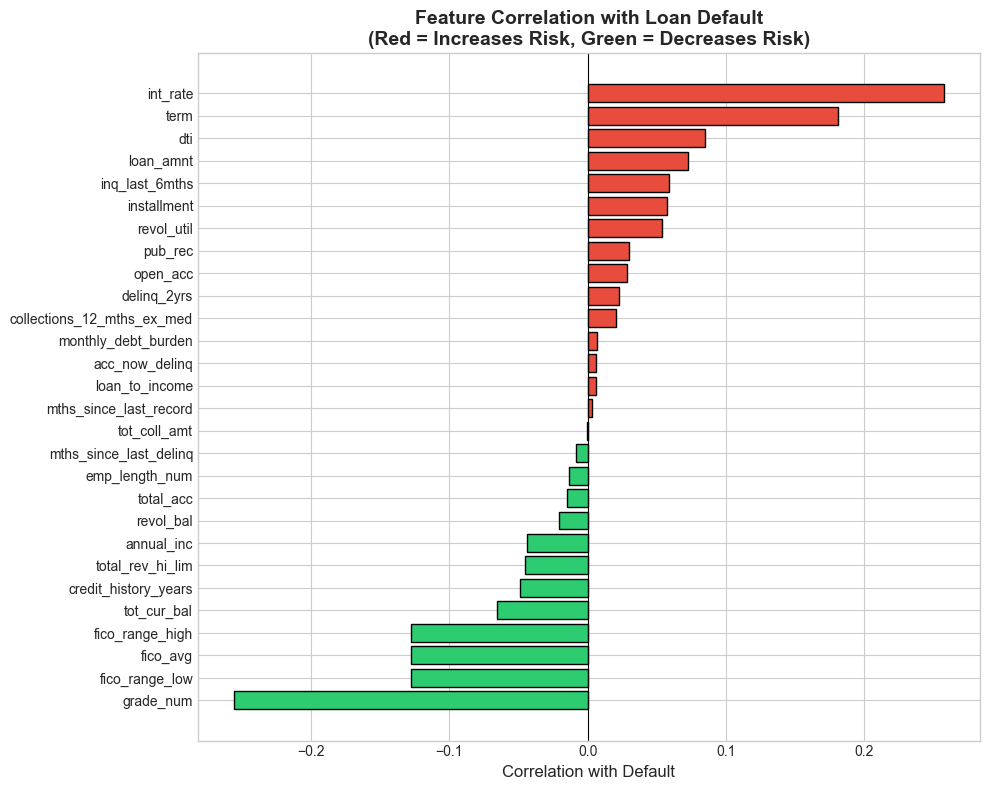

✓ Saved to ../images/04_correlation_with_target.png


In [19]:
# Visualization: Correlation with Target
fig, ax = plt.subplots(figsize=(10, 8))

# Sort and get top correlations
target_corr_sorted = target_corr.sort_values()

# Color based on positive/negative
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in target_corr_sorted.values]

bars = ax.barh(target_corr_sorted.index, target_corr_sorted.values, color=colors, edgecolor='black')
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_xlabel('Correlation with Default', fontsize=12)
ax.set_title('Feature Correlation with Loan Default\n(Red = Increases Risk, Green = Decreases Risk)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/04_correlation_with_target.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/04_correlation_with_target.png")

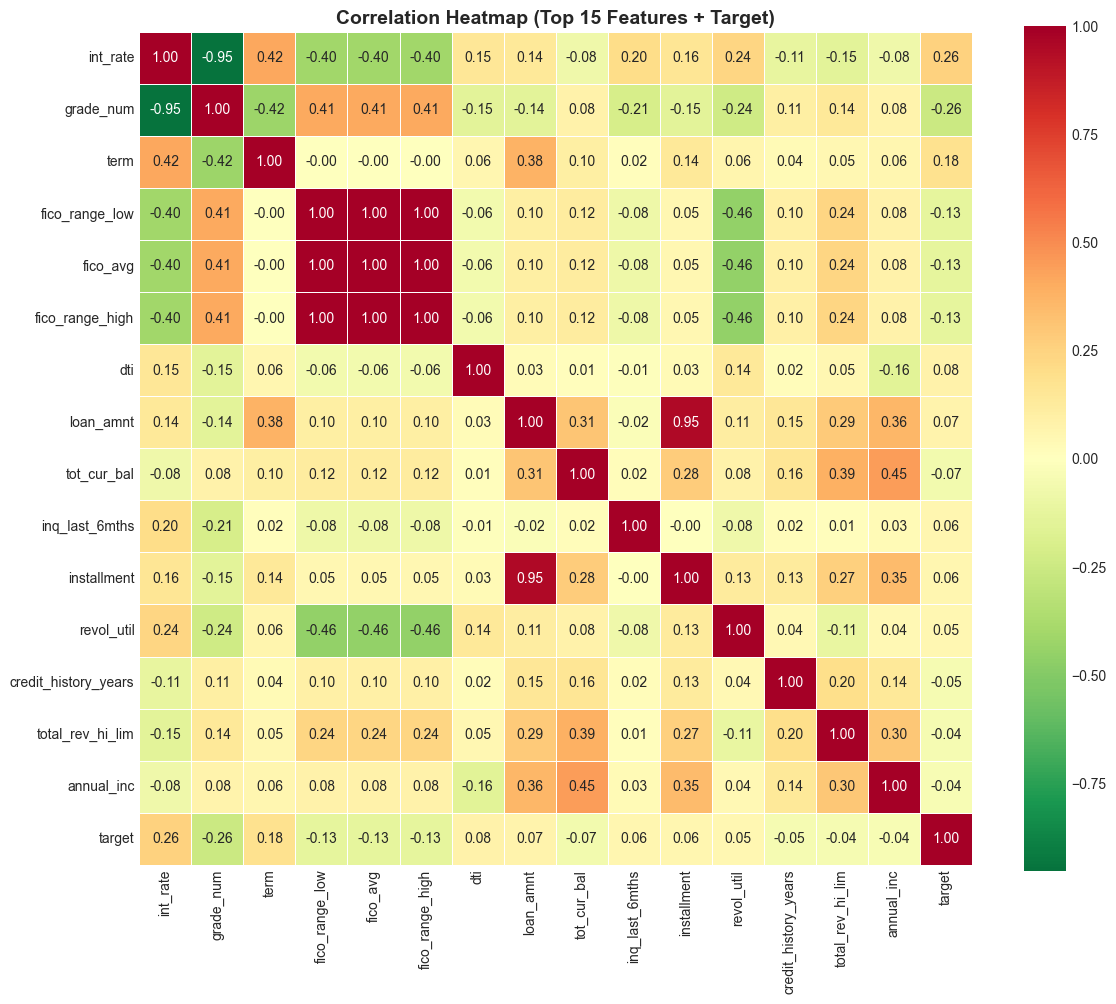

✓ Saved to ../images/05_correlation_heatmap.png


In [20]:
# Full correlation heatmap (top 15 features)
top_features = target_corr.abs().sort_values(ascending=False).head(15).index.tolist()
top_features.append('target')

plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, cmap='RdYlGn_r', center=0,
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Top 15 Features + Target)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../images/05_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/05_correlation_heatmap.png")

---
## 6. Default Rate by Categorical Features

In [21]:
# Default rate by purpose
purpose_default = df.groupby('purpose').agg(
    total_loans=('target', 'count'),
    default_rate=('target', 'mean')
).reset_index()
purpose_default['default_rate_pct'] = purpose_default['default_rate'] * 100
purpose_default = purpose_default.sort_values('default_rate_pct', ascending=True)

print("Default Rate by Loan Purpose:")
print(purpose_default.to_string(index=False))

Default Rate by Loan Purpose:
           purpose  total_loans  default_rate  default_rate_pct
           wedding          446      0.123318         12.331839
               car         2680      0.147388         14.738806
       credit_card        54463      0.183776         18.377614
  home_improvement        16505      0.198425         19.842472
    major_purchase         5340      0.199813         19.981273
          vacation         1691      0.199882         19.988173
       educational           76      0.210526         21.052632
           medical         2927      0.224804         22.480355
debt_consolidation       145221      0.226234         22.623450
             other        14476      0.229414         22.941420
             house         1362      0.238620         23.861968
            moving         1799      0.247360         24.735964
  renewable_energy          186      0.268817         26.881720
    small_business         2828      0.319307         31.930693


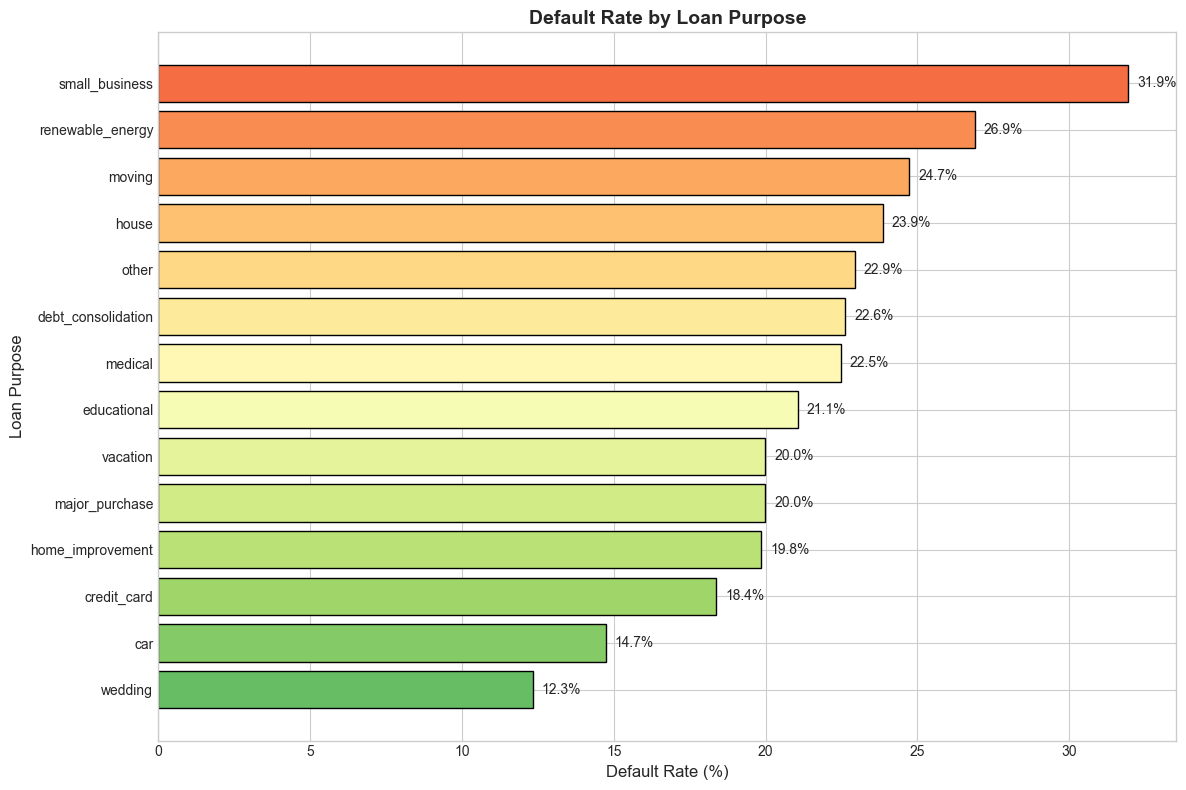

✓ Saved to ../images/06_default_by_purpose.png


In [22]:
# Visualization: Default Rate by Purpose
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(purpose_default)))

bars = ax.barh(purpose_default['purpose'], purpose_default['default_rate_pct'], 
               color=colors, edgecolor='black')

# Add percentage labels
for bar, rate in zip(bars, purpose_default['default_rate_pct']):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{rate:.1f}%', va='center', fontsize=10)

ax.set_xlabel('Default Rate (%)', fontsize=12)
ax.set_ylabel('Loan Purpose', fontsize=12)
ax.set_title('Default Rate by Loan Purpose', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/06_default_by_purpose.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/06_default_by_purpose.png")

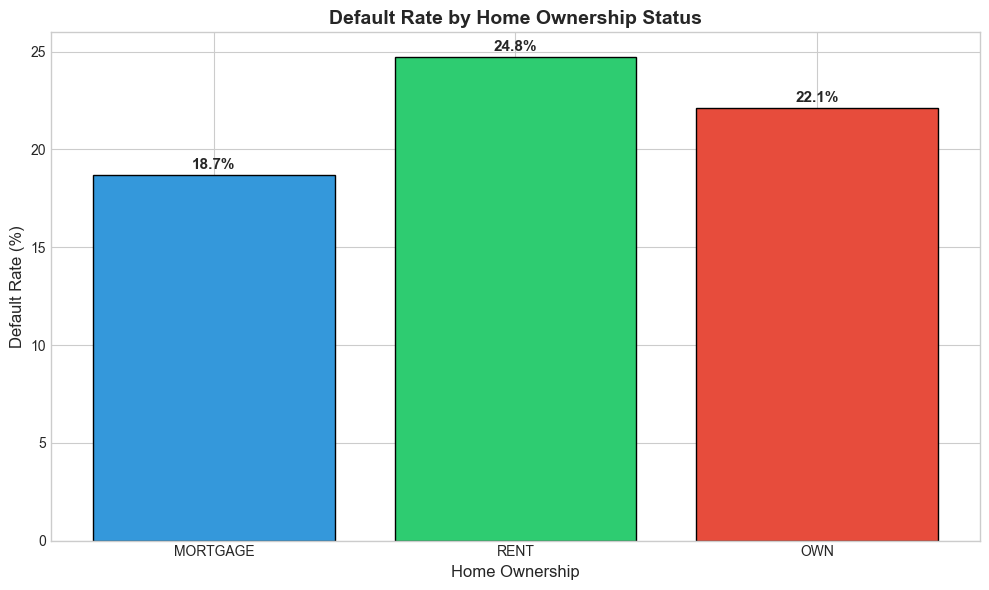

✓ Saved to ../images/07_default_by_home_ownership.png


In [23]:
# Default rate by home ownership
home_default = df.groupby('home_ownership').agg(
    total_loans=('target', 'count'),
    default_rate=('target', 'mean')
).reset_index()
home_default['default_rate_pct'] = home_default['default_rate'] * 100
home_default = home_default.sort_values('total_loans', ascending=False)

# Filter to significant categories (>1000 loans)
home_default_sig = home_default[home_default['total_loans'] > 1000]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(home_default_sig['home_ownership'], home_default_sig['default_rate_pct'],
              color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12'][:len(home_default_sig)],
              edgecolor='black')

for bar, rate in zip(bars, home_default_sig['default_rate_pct']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
            f'{rate:.1f}%', ha='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Home Ownership', fontsize=12)
ax.set_ylabel('Default Rate (%)', fontsize=12)
ax.set_title('Default Rate by Home Ownership Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/07_default_by_home_ownership.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/07_default_by_home_ownership.png")

---
## 7. Interest Rate Analysis

In [24]:
# Interest rate bins
df['int_rate_bin'] = pd.cut(df['int_rate'], 
                             bins=[0, 8, 12, 16, 20, 30],
                             labels=['0-8%', '8-12%', '12-16%', '16-20%', '20%+'])

int_rate_default = df.groupby('int_rate_bin').agg(
    total_loans=('target', 'count'),
    default_rate=('target', 'mean')
).reset_index()
int_rate_default['default_rate_pct'] = int_rate_default['default_rate'] * 100

print("Default Rate by Interest Rate:")
print(int_rate_default.to_string(index=False))

Default Rate by Interest Rate:
int_rate_bin  total_loans  default_rate  default_rate_pct
        0-8%        38306      0.066621          6.662142
       8-12%        70595      0.148892         14.889156
      12-16%        77999      0.230849         23.084911
      16-20%        42857      0.325548         32.554775
        20%+        19273      0.424480         42.447984


In [25]:
import numpy as np
import matplotlib.pyplot as plt


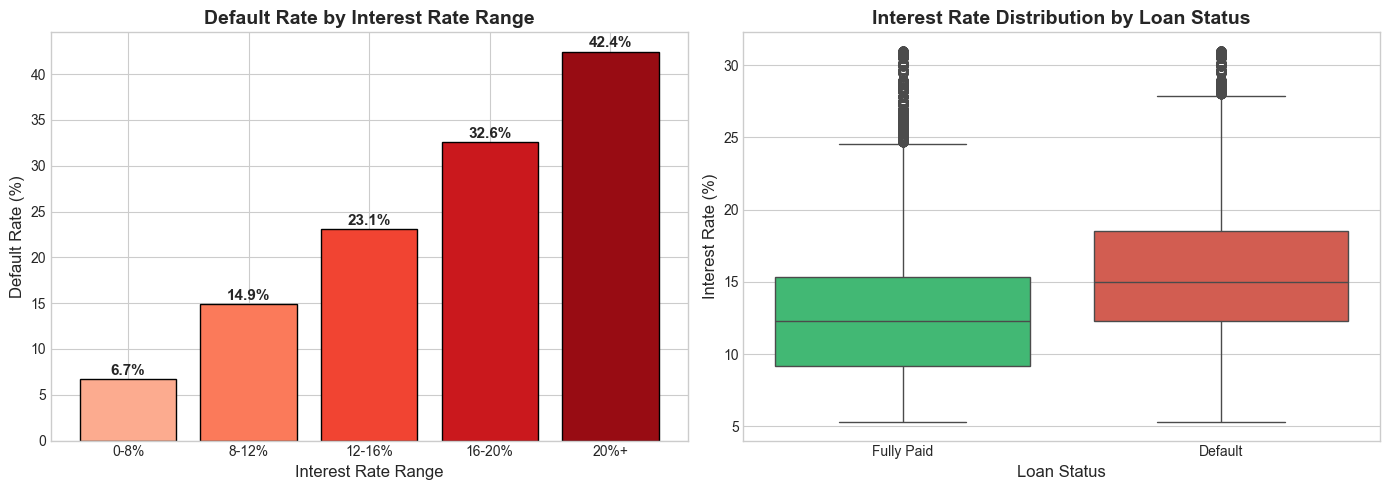

✓ Saved to ../images/08_interest_rate_analysis.png


In [26]:
# Visualization: Interest Rate vs Default
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Bar chart by bins
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(int_rate_default)))
bars = axes[0].bar(int_rate_default['int_rate_bin'].astype(str), 
                   int_rate_default['default_rate_pct'],
                   color=colors, edgecolor='black')

for bar, rate in zip(bars, int_rate_default['default_rate_pct']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{rate:.1f}%', ha='center', fontsize=11, fontweight='bold')

axes[0].set_xlabel('Interest Rate Range', fontsize=12)
axes[0].set_ylabel('Default Rate (%)', fontsize=12)
axes[0].set_title('Default Rate by Interest Rate Range', fontsize=14, fontweight='bold')

# Right: Box plot - FIX: use string keys or hue parameter
sns.boxplot(data=df, x='target', y='int_rate', ax=axes[1],
            palette=['#2ecc71', '#e74c3c'])  # Use list instead of dict

axes[1].set_xlabel('Loan Status', fontsize=12)
axes[1].set_ylabel('Interest Rate (%)', fontsize=12)
axes[1].set_xticklabels(['Fully Paid', 'Default'])
axes[1].set_title('Interest Rate Distribution by Loan Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/08_interest_rate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/08_interest_rate_analysis.png")

---
## 8. FICO Score Analysis

In [27]:
# FICO score bins
df['fico_bin'] = pd.cut(df['fico_avg'], 
                        bins=[0, 650, 700, 750, 800, 900],
                        labels=['<650', '650-700', '700-750', '750-800', '800+'])

fico_default = df.groupby('fico_bin').agg(
    total_loans=('target', 'count'),
    default_rate=('target', 'mean')
).reset_index()
fico_default['default_rate_pct'] = fico_default['default_rate'] * 100

print("Default Rate by FICO Score:")
print(fico_default.to_string(index=False))

Default Rate by FICO Score:
fico_bin  total_loans  default_rate  default_rate_pct
    <650           49      0.265306         26.530612
 650-700       152968      0.251157         25.115710
 700-750        77415      0.171052         17.105212
 750-800        16733      0.108229         10.822925
    800+         2835      0.079718          7.971781


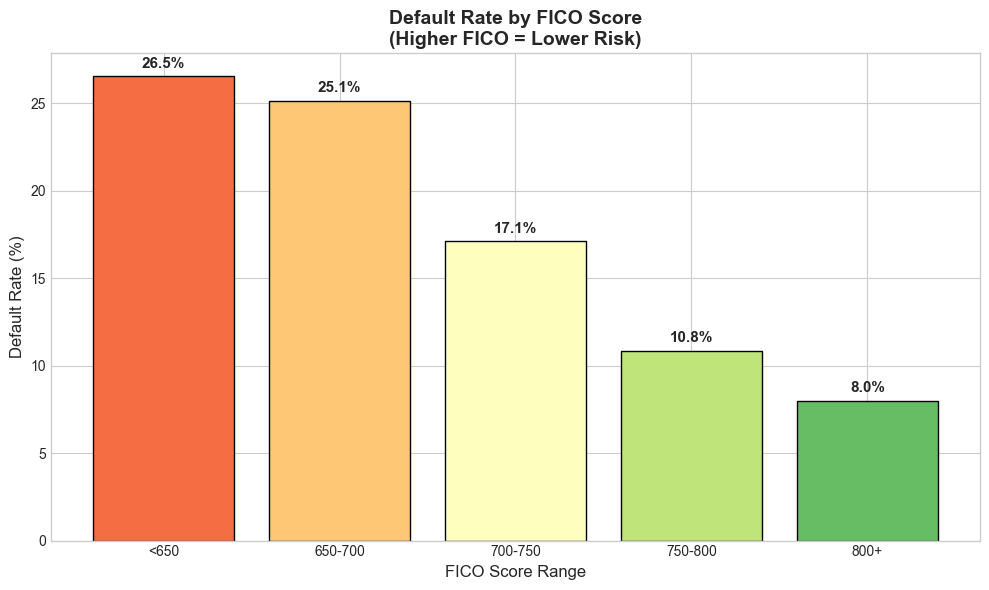

✓ Saved to ../images/09_default_by_fico.png


In [28]:
# Visualization: FICO Score vs Default
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(fico_default)))

bars = ax.bar(fico_default['fico_bin'].astype(str), fico_default['default_rate_pct'],
              color=colors, edgecolor='black')

for bar, rate in zip(bars, fico_default['default_rate_pct']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{rate:.1f}%', ha='center', fontsize=11, fontweight='bold')

ax.set_xlabel('FICO Score Range', fontsize=12)
ax.set_ylabel('Default Rate (%)', fontsize=12)
ax.set_title('Default Rate by FICO Score\n(Higher FICO = Lower Risk)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/09_default_by_fico.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/09_default_by_fico.png")

---
## 9. Geographic Analysis

In [29]:
# Default rate by state
state_default = df.groupby('addr_state').agg(
    total_loans=('target', 'count'),
    default_rate=('target', 'mean')
).reset_index()
state_default['default_rate_pct'] = state_default['default_rate'] * 100

# Top 10 states by loan volume
top_states = state_default.nlargest(10, 'total_loans')
print("Top 10 States by Loan Volume:")
print(top_states.to_string(index=False))

Top 10 States by Loan Volume:
addr_state  total_loans  default_rate  default_rate_pct
        CA        36680      0.212186         21.218648
        TX        20663      0.211296         21.129555
        NY        20557      0.238410         23.841027
        FL        18064      0.227137         22.713685
        IL         9642      0.195914         19.591371
        NJ         8981      0.231934         23.193408
        PA         8364      0.221903         22.190340
        OH         8045      0.217402         21.740211
        GA         7921      0.196440         19.643984
        VA         7175      0.220906         22.090592


In [30]:
# Interactive US Map with Plotly
fig = px.choropleth(state_default,
                    locations='addr_state',
                    locationmode='USA-states',
                    color='default_rate_pct',
                    color_continuous_scale='RdYlGn_r',
                    scope='usa',
                    title='<b>Default Rate by State</b>',
                    labels={'default_rate_pct': 'Default Rate (%)'})

fig.update_layout(height=500)
fig.write_html('../images/10_default_by_state_map.html')
fig.show()
print("✓ Saved to ../images/10_default_by_state_map.html")

✓ Saved to ../images/10_default_by_state_map.html


---
## 10. Loan Amount Analysis

In [32]:
# Loan amount bins
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], 
                              bins=[0, 5000, 10000, 15000, 20000, 25000, 40000],
                              labels=['0-5K', '5-10K', '10-15K', '15-20K', '20-25K', '25K+'])

loan_amnt_default = df.groupby('loan_amnt_bin').agg(
    total_loans=('target', 'count'),
    default_rate=('target', 'mean'),
    avg_int_rate=('int_rate', 'mean')
).reset_index()
loan_amnt_default['default_rate_pct'] = loan_amnt_default['default_rate'] * 100

print("Analysis by Loan Amount:")
print(loan_amnt_default.to_string(index=False))

Analysis by Loan Amount:
loan_amnt_bin  total_loans  default_rate  avg_int_rate  default_rate_pct
         0-5K        33752      0.169471     12.963732         16.947144
        5-10K        69145      0.185523     12.366707         18.552318
       10-15K        52534      0.220467     13.259945         22.046675
       15-20K        39856      0.243477     13.580875         24.347652
       20-25K        24668      0.242906     13.785269         24.290579
         25K+        30045      0.262440     15.033766         26.243967


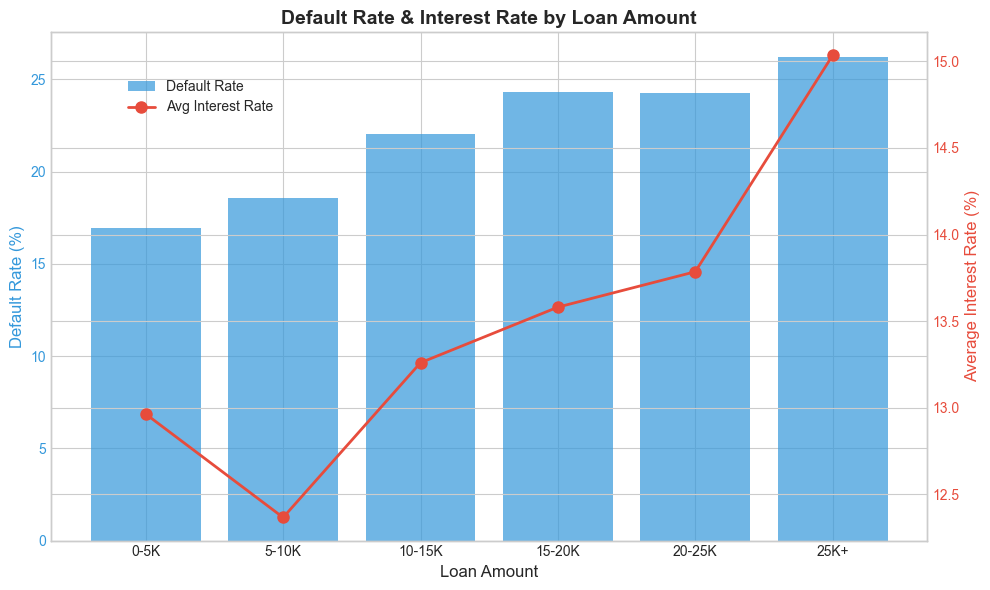

✓ Saved to ../images/11_loan_amount_analysis.png


In [33]:
# Dual axis chart: Loan amount vs default rate and avg interest rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for default rate
x = range(len(loan_amnt_default))
bars = ax1.bar(x, loan_amnt_default['default_rate_pct'], 
               color='#3498db', alpha=0.7, label='Default Rate')
ax1.set_xlabel('Loan Amount', fontsize=12)
ax1.set_ylabel('Default Rate (%)', fontsize=12, color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')
ax1.set_xticks(x)
ax1.set_xticklabels(loan_amnt_default['loan_amnt_bin'].astype(str))

# Line chart for average interest rate
ax2 = ax1.twinx()
ax2.plot(x, loan_amnt_default['avg_int_rate'], 'o-', color='#e74c3c', 
         linewidth=2, markersize=8, label='Avg Interest Rate')
ax2.set_ylabel('Average Interest Rate (%)', fontsize=12, color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title('Default Rate & Interest Rate by Loan Amount', fontsize=14, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.88))

plt.tight_layout()
plt.savefig('../images/11_loan_amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved to ../images/11_loan_amount_analysis.png")

---
## 11. Interactive Dashboard Summary (Plotly)

In [34]:
# Create a comprehensive dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Default Rate by Grade', 'Default Rate by FICO', 
                    'Interest Rate Distribution', 'Loan Amount Distribution'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'histogram'}, {'type': 'histogram'}]]
)

# Plot 1: Default by Grade
fig.add_trace(
    go.Bar(x=grade_default['grade'], y=grade_default['default_rate_pct'],
           marker_color=grade_default['default_rate_pct'],
           marker_colorscale='RdYlGn_r', name='Grade'),
    row=1, col=1
)

# Plot 2: Default by FICO
fig.add_trace(
    go.Bar(x=fico_default['fico_bin'].astype(str), y=fico_default['default_rate_pct'],
           marker_color=fico_default['default_rate_pct'],
           marker_colorscale='RdYlGn', name='FICO'),
    row=1, col=2
)

# Plot 3: Interest Rate by Target
fig.add_trace(
    go.Histogram(x=df[df['target']==0]['int_rate'], name='Fully Paid', 
                 marker_color='#2ecc71', opacity=0.7),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=df[df['target']==1]['int_rate'], name='Default',
                 marker_color='#e74c3c', opacity=0.7),
    row=2, col=1
)

# Plot 4: Loan Amount by Target
fig.add_trace(
    go.Histogram(x=df[df['target']==0]['loan_amnt'], name='Fully Paid',
                 marker_color='#2ecc71', opacity=0.7, showlegend=False),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=df[df['target']==1]['loan_amnt'], name='Default',
                 marker_color='#e74c3c', opacity=0.7, showlegend=False),
    row=2, col=2
)

fig.update_layout(
    height=700, 
    title_text='<b>Credit Risk EDA Dashboard</b>',
    barmode='overlay'
)

fig.write_html('../images/12_eda_dashboard.html')
fig.show()
print("✓ Saved to ../images/12_eda_dashboard.html")

✓ Saved to ../images/12_eda_dashboard.html


---
## 12. Key Insights Summary

In [35]:
print("="*70)
print("                     EDA KEY INSIGHTS SUMMARY")
print("="*70)

print(f"""
1. TARGET DISTRIBUTION
   - Default Rate: {df['target'].mean()*100:.2f}%
   - Class Imbalance: {(1-df['target'].mean())*100:.1f}% Fully Paid vs {df['target'].mean()*100:.1f}% Default

2. LOAN GRADE (Strongest Predictor)
   - Grade A Default Rate: {grade_default[grade_default['grade']=='A']['default_rate_pct'].values[0]:.1f}%
   - Grade G Default Rate: {grade_default[grade_default['grade']=='G']['default_rate_pct'].values[0]:.1f}%
   - Insight: Clear risk segmentation by grade

3. INTEREST RATE
   - Strong positive correlation with default
   - Higher interest = Higher risk (risk-based pricing)

4. FICO SCORE
   - Strong negative correlation with default
   - Higher FICO = Lower risk

5. TOP PREDICTIVE FEATURES (by correlation):
""")

print(target_corr.head(5).to_string())

print("""
6. RECOMMENDATIONS FOR MODELING:
   - Use stratified sampling (class imbalance)
   - Focus on: int_rate, grade, fico_avg, dti
   - Consider interaction features
""")

print("="*70)

                     EDA KEY INSIGHTS SUMMARY

1. TARGET DISTRIBUTION
   - Default Rate: 21.48%
   - Class Imbalance: 78.5% Fully Paid vs 21.5% Default

2. LOAN GRADE (Strongest Predictor)
   - Grade A Default Rate: 6.8%
   - Grade G Default Rate: 50.1%
   - Insight: Clear risk segmentation by grade

3. INTEREST RATE
   - Strong positive correlation with default
   - Higher interest = Higher risk (risk-based pricing)

4. FICO SCORE
   - Strong negative correlation with default
   - Higher FICO = Lower risk

5. TOP PREDICTIVE FEATURES (by correlation):

int_rate          0.258090
term              0.181063
dti               0.084780
loan_amnt         0.072813
inq_last_6mths    0.058540

6. RECOMMENDATIONS FOR MODELING:
   - Use stratified sampling (class imbalance)
   - Focus on: int_rate, grade, fico_avg, dti
   - Consider interaction features



---
## 13. Export Data for Dashboard Tools

In [36]:
# Export summary data for Tableau/Power BI
grade_default.to_csv('../data/processed/summary_by_grade.csv', index=False)
purpose_default.to_csv('../data/processed/summary_by_purpose.csv', index=False)
state_default.to_csv('../data/processed/summary_by_state.csv', index=False)

print("✓ Exported summary files for Tableau/Power BI:")
print("  - ../data/processed/summary_by_grade.csv")
print("  - ../data/processed/summary_by_purpose.csv")
print("  - ../data/processed/summary_by_state.csv")

✓ Exported summary files for Tableau/Power BI:
  - ../data/processed/summary_by_grade.csv
  - ../data/processed/summary_by_purpose.csv
  - ../data/processed/summary_by_state.csv


---

## Next Steps

Proceed to **03_feature_engineering.ipynb** for advanced feature creation, or directly to **04_modeling.ipynb** for model building.